<a href="https://colab.research.google.com/github/selinabdik/QM2/blob/main/QM2_Notebook_Summaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WEEK 1**

In [1]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
!mkdir data

In [ ]:
!mkdir ./data/wk1
!curl https://s3.eu-west-2.amazonaws.com/qm2/wk1/data.csv -o ./data/wk1/data.csv
!curl https://s3.eu-west-2.amazonaws.com/qm2/wk1/sample_group.csv -o ./data/wk1/sample_group.csv

In [ ]:
import pandas

import matplotlib
%matplotlib inline

In [ ]:
data = pandas.read_csv('./data/wk1/data.csv')
data.head()

In [ ]:
#sort data with sort_values()
#we can specify which column to sort the data by, and whether we want ascending or descending order
#optional arguments 'by' and 'ascending'

#sort in descending order of height:
data.sort_values(by='Approx height', ascending = False).head()

# Assessed Question 1
The URL below contains a dataset of the most streamed songs on spotify in 2023: https://storage.googleapis.com/qm2/wk1/spotify-2023.csv

Download the dataset and save it in the ./data/wk1/ directory.
Load the dataset as a pandas dataframe, and inspect it. Two of the column names have accidentally been swapped around. Use common sense to figure out which ones these are before proceeding with your analysis.
Filter the dataset to only contain songs in the key of C sharp.
Sort the dataframe in descending order of streams.
QUESTION: which artist has the song with the highest number of streams?

In [ ]:
#downloading the dataset from the URL and saving it in the ./data/wk1/ directory
!curl https://storage.googleapis.com/qm2/wk1/spotify-2023.csv -o ./data/wk1/spotify-2023.csv

In [ ]:
spotifydata = pandas.read_csv('./data/wk1/spotify-2023.csv')
spotifydata.head()

In [ ]:
#'Streams' and 'bpm' columns' names have been swapped around.
#To fix this, I will swap the column names in the spotifydata dataframe

spotifydata = spotifydata.rename(columns={'streams': 'bpm', 'bpm': 'streams'})
spotifydata.head()

In [ ]:
#filtering the dataset to only contain songs in the key of C sharp
filtered_data = spotifydata[spotifydata['key'] == 'C#']
filtered_data.head()

In [ ]:
#Sort the dataframe in descending order of streams.
spotifydata.sort_values(by='streams', ascending = False).head()

**Question: which artist has the song with the highest number of streams?**

Answer: The Weeknd, "Blinding Lights" with 3703895074 streams

# **WEEK 2**

In [ ]:
!mkdir data/wk2
!curl https://s3.eu-west-2.amazonaws.com/qm2/wk2/incomes.csv -o ./data/wk2/incomes.csv

In [ ]:
import pandas
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
#tells matplotlib to display plots directly within the notebook output cell, rather than opening a separate window.
plt.style.use('ggplot') #This line sets the plotting style to "ggplot".

pylab.rcParams['figure.figsize'] = (10., 8.) ## make the plots a little wider by default

In [ ]:
data_path = "./data/wk2/incomes.csv"

income =  pandas.read_csv(data_path, index_col=0) # tells pandas to use the first column (the Percentile) as the index to make life easier.
income.head()

The percentile tells us how people on that income rank - so the final category, 99% (which is really binned, so 99%<n ≤  100%), is telling us how much "the 1%" earn. Let's find out:

In [ ]:
income.tail()

the %1 earn, on average, about £2000 a week.

to compare to peopple in the 90% decile, we can access particular rows in a dataframe using .loc[row index]

In [ ]:
income.loc[90]

In [ ]:
#to select a range of values (90-95th percentiles)
income.loc[90:95]

In [ ]:
#to extract the actual value instead of just the whole row, reference the column as well as the row
income['Net equivalised household income in 2010-11, week']

In [ ]:
#to access a particular cell, tell Python the row and the column
income['Net equivalised household income in 2010-11, week'].loc[90]

In [ ]:
#you can also do it the other way around
income.loc[90]['Net equivalised household income in 2010-11, week']

In [ ]:
#another way: use an explicit variable for the dataframe
smallDataFrame = income['Net equivalised household income in 2010-11, week']
smallDataFrame.loc[90]

In [ ]:
#using a range to look at a few rows of data
income['Net equivalised household income in 2010-11, week'].loc[90:95]

**Examining the distribution**

Returning to the overall statistics, the 90% percentile earns less than half the top percentile ("the 1%"); if you're taking home over £800 as a household, you're in the top 10% of earners.

How does:

The income of "the 1%" compare with the mean and median across the population, as a proportion?

How does the 1% compare with the 90th percentile (the 10%)?

How does the 10% compare with the median and mean?

-----

The 1% earn about 60 times the poorest groups in society - and we've made other comparisons. But that's not the whole story. Let's look at the income graph.

In pandas, we can plot this fairly easily...

In [ ]:
plot = income['Net equivalised household income in 2010-11, week'].plot()
plt.title('UK Net Equivalised Income by Percentile per week, 2010-11')
plt.xlabel('Income Percentile')
plt.ylabel('Income (Net, Equivalised) [GBP]')

mean_income = income['Net equivalised household income in 2010-11, week'].mean()
median_income = income['Net equivalised household income in 2010-11, week'].median()
plot.axhline(mean_income, color='red',label='Mean')
plot.axhline(median_income, color='green',label='Median')
plt.legend()
plt.show()

In this context, the median income represents the income level that divides the population into two equal halves. 50% of households earn less than the median income, and 50% earn more.

By comparing the mean and median lines on the plot, you can get an idea of the income distribution:

- If the mean is higher than the median, it suggests that the distribution is skewed to the right (some very high incomes are pulling the average up).

- If the mean is close to the median, it indicates a more symmetrical distribution.

axvline : drawing vertical lines on the axis

axhline : drawing horizontal lines

We see a curve that is pretty linear in the middle region, but curves rapidly upwards in the higher percentile and looks more like a power law.

In [ ]:
#This is going to throw a load of errors
#income[['Single adult','Lone parent, one child under 14']].plot()
#Error: "no numeric data to plot", weird because we've seen the data and have even plotted some of it.

DataFrames, as we are starting to see, give us the chance to plot, chop, slice and data to help us make sense of it.

Here, we will create a new DataFrame to take only two columns of data, and get rid of any blank cells and any cells which are not being read as numbers - normally a sign of a missing value or a non-numerical character.

Why could this be happening? It could be:

- due to blank spaces in the text file

- due to letters where there should be numbers

- due to characters (",", "-", etc) that shouldn't really be there

In general, there will be some detective work required to figure out what's wrong in our text file. Your best bet is sometimes to open up the data in a text editor, like I've done here:

In [ ]:
from IPython.display import Image

data_path = "https://s3.eu-west-2.amazonaws.com/qm2/wk2/data.png"
Image(data_path)

That's a screenshot of our datafile, opened up in a text editor. As we can see, these numbers are separated by commas and surrounded by quotation marks - this is normal, and what .csv files are supposed to look like.

However, there are a lot of commas within the numbers - which makes it easier for people to read, but confuses software. Luckily, Python has a method for dealing with this - the "replace" method.

Unfortunately, this dataframe is quite messy, so I'm going to have to extract just the columns of data I'm interested in to make it work. I'll do that by creating a new dataframe:

In [ ]:
#creating a new dataframe (clean)
clean = income[['Childless couple, annual income','Couple, two children under 14']]
clean.head()

In [ ]:
#cleaning up the data (removing the commas)
clean = clean.replace(',','', regex=True)

#regex means Regular Expression, which is a way of replacing and cleaning text

# In addition, missing values are sometimes written as '-', in order for Python to understand that it is just a missing numerical
# value, all '-' need to be replaced with 'NaN'.
clean = clean.replace('-', 'NaN', regex=True).astype('float')

clean.head()

**More questions of the data**

- If the top 20% of income shows such a sharp increase, how do we know that there isn't a similar uptick within the 1%? We've already seen that the mean of the dataset as a whole is much less than the half the maximum category (it's 25% of the maximum). What if that's true within the 1%, and £2,000/week as a fraction of the 0.1%, or the 0.01%?

- How does this break down for gender, or educational background, or other factors like ethnicity or country of origin?

- Which parts of the income curve show greater gaps between these subgroups and what might it say about the underlying causal mechanisms?

In [ ]:
clean.plot()
plt.title('A Modest Proposal: The fiscal benefits of childbirth')
plt.xlabel('Percentile')
plt.ylabel('Income Per Week [GBP]')

In [ ]:
#Exercise: Clean and plot income data for the columns we used above for single people and childless couples. Reflect and comment on the differences.

# Extract columns for single adults and childless couples
clean_single_couple = income[['Single adult', 'Childless couple, annual income']]

# Clean the data: remove commas, replace hyphens with NaN, and convert to float
clean_single_couple = clean_single_couple.replace(',', '', regex=True)
clean_single_couple = clean_single_couple.replace('-', 'NaN', regex=True).astype('float')

#plotting the data:
clean_single_couple.plot()
plt.title('Income Comparison: Single Adults vs. Childless Couples')
plt.xlabel('Percentile')
plt.ylabel('Income Per Week [GBP]')
plt.legend()  # Display the legend to identify the lines
plt.show()

So far, we've dealt with selecting data in a particular row of column by index or label. What if we now want to filter the data by value? For example, let's say I want to see the data for all Childless couples who earn more than 50,000 (net equivalised) pounds every year. This looks like:

In [ ]:
clean = income[['Childless couple, annual income','Couple, two children under 14']]
clean = clean.replace(',', '', regex=True)
clean = clean.replace('-', 'NaN', regex=True).astype('float')
clean[clean['Childless couple, annual income']>50000] #line of code for selection
#dataframe[some selection] this command is returning a set of indices where that statement is true

In [ ]:
#On an approporiately labelled graph, plot the incomes of all single adults whose net equivalised income is less than or equal to £10,000.
#What proportion of the population is this?

single_adult_income = income['Single adult']

# Clean the data: remove commas, replace hyphens with NaN, and convert to float
single_adult_income = single_adult_income.replace(',', '', regex=True)
single_adult_income = single_adult_income.replace('-', 'NaN', regex=True).astype('float')

# Filter for incomes less than or equal to £10,000
filtered_income = single_adult_income[single_adult_income <= 10000]

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(filtered_income.index, filtered_income.values, marker='o', linestyle='-')

# Customize the plot
plt.title('Incomes of Single Adults (Net Equivalised Income ≤ £10,000)')
plt.xlabel('Income Percentile')
plt.ylabel('Income (Net, Equivalised) [GBP]')
plt.grid(True)

# Display the plot
plt.show()

# Calculate the proportion
proportion = len(filtered_income) / len(single_adult_income)

print(f"Proportion of single adults with income ≤ £10,000: {proportion:.2f}")


# Web Scraping

In this example, we've been working with a .csv file that contains all the data we want. That's not always the case. Let's say we're interested in getting the data from a table on a website. Websites are built using HTML code, so what we need to figure out how to look inside the website's code and pull out the data we want. Luckily, pandas has a built in function that can automatically recognize HTML tables in websites and turn them into dataframes.

Let's start with the Netflix Top 10 website. You'll notice two tables: the first showing the top 10 films this week, and the second (farther down) showing the most popular filsms based on their first 28 days on netflix.

We can download both of these tables into python using one pandas function: read_html

In [ ]:
url='https://top10.netflix.com/'

tables=pandas.read_html(url)

print(tables)

When we print the results of what was scraped, it's pretty ugly. One of the reasons is that the tables variable is actually a list of dataframes. Because there were two tables on our website, read_html has returned both of those tables and put them in a list. let's save the first table as a new dataframe called top10 and have a closer look.

In [ ]:
top10=tables[0]
top10

This looks more like the dataframes we were looking at earlier. There's a big chunk of text (this is HTML code, the language websites are built with) where the name of the second column should be.

read_html is usually pretty smart, and can actually read the column names from the tables on the website. It seems to have gotten confused for this one column.

If we print the columns from the We can rename that column using the rename function.

Since we know it's the second column, we can select it with top10.columns[1]

In [ ]:
top10.rename(columns={top10.columns[1]: "Title" }, inplace = True)
#inplace = True: This is crucial. It means that the changes are made directly to the top10 DataFrame. Without this, rename() would create a new DataFrame with the changed name, leaving the original top10 unchanged.
top10

And there we have it; a nicely formatted dataframe ready for analysis, straight from a website.

# Assessed Question 2

Using the following URL https://en.wikipedia.org/wiki/List_of_Nobel_laureates_in_Chemistry create a plot of the top 10 countries in terms of nobel laureates. First, follow the steps below:*italik metin*

In [ ]:
# scrape the table of Nobel Laureates in Chemistry using read_html. remember, this gives us a LIST of dataframes! lets call this list chem_tables
url='https://en.wikipedia.org/wiki/List_of_Nobel_laureates_in_Chemistry'
chem_tables=pandas.read_html(url)
print(tables)

In [ ]:
# select the first dataframe from this list and call it chem
chem=chem_tables[0]
chem

I'll help you out with this next bit. We'll be using the `groupby` function in pandas to group our dataframe such that each row is a country (rather than a person, as it currently is).

We do this by using `<dataframe>.groupby('<column name>')`.

Since we're aggregating, we need to tell python how we want it to aggregate our values. In this case, we just want to count the number of rows for each country; we can do this using `.size()`.

You can use many different aggregation functions, e.g. `.mean()` if you wanted to calculate the average of a specific column.

In [ ]:
# create a new dataframe called 'country' in which each row is a country, and the values represent the number of nobel laureates.
country = chem.groupby('Nationality[B]').size()
country.head()

In [ ]:
# now sort it in descending order
country.sort_values(ascending = False).head()

In [ ]:
# finally, plot the top 10 countries
top10countries = country.sort_values(ascending = False).head(10)

top10countries.plot()
plt.title('Top 10 Countries by Number of Nobel Laureates in Chemistry')
plt.xlabel('Country')
plt.ylabel('Number of Nobel Laureates')

In [ ]:
#Question: What country has the isxth most nobel prizes in chemistry?
top10countries
#Answer: Japanese


# **WEEK 3**
Spatial data

In [1]:
%%capture
!pip install Basemap
!pip install ipyleaflet

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
from datetime import datetime

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 8)

In [3]:
df=pd.read_csv('https://qm2.s3.eu-west-2.amazonaws.com/wk3/california_aqi.csv')
df

,Date,Site ID,POC,PM,AQI,Site Name,CBSA_NAME,COUNTY,latitude,longitude
0,1/1/20,60010007,3,8.6,36,Livermore,"San Francisco-Oakland-Hayward, CA",Alameda,37.687526,-121.784217
1,1/2/20,60010007,3,4.5,19,Livermore,"San Francisco-Oakland-Hayward, CA",Alameda,37.687526,-121.784217
2,1/3/20,60010007,3,14.2,55,Livermore,"San Francisco-Oakland-Hayward, CA",Alameda,37.687526,-121.784217
3,1/4/20,60010007,3,10.9,45,Livermore,"San Francisco-Oakland-Hayward, CA",Alameda,37.687526,-121.784217
4,1/5/20,60010007,3,7.8,33,Livermore,"San Francisco-Oakland-Hayward, CA",Alameda,37.687526,-121.784217
...,...,...,...,...,...,...,...,...,...,...
55686,11/29/20,61131003,1,20.3,68,Woodland-Gibson Road,"Sacramento--Roseville--Arden-Arcade, CA",Yolo,38.661210,-121.732690
55687,12/18/20,61131003,1,2.8,12,Woodland-Gibson Road,"Sacramento--Roseville--Arden-Arcade, CA",Yolo,38.661210,-121.732690
55688,12/20/20,61131003,1,22.4,73,Woodland-Gibson Road,"Sacramento--Roseville--Arden-Arcade, CA",Yolo,38.661210,-121.732690
55689,12/23/20,61131003,1,11.8,49,Woodland-Gibson Road,"Sacramento--Roseville--Arden-Arcade, CA",Yolo,38.661210,-121.732690


Each row in this dataset is an individual reading from an air quality sensor. The first row is a reading from sensor number 60010007 on January 1st 2020. It is located in Alameda County, and recorded an Air Quality Index (AQI) reading of 36. So for each sensor (uniquely identified by the Site ID column) we will have 365 readings.

We also have the latitude and longitude of each one of these air quality sensors. The presence of these fields makes this spatio-temporal data. We'll first analyze the temporal dimension of our data, before adding in the spatial dimension

**Temporal Data**

Before we go any further, we need to focus on a very special column in our dataset: the "Date" column. We'll be relying heavily on this dimension of our dataset.

Whenever we have temporal data, the first thing we want to do is check whether pandas is storing it as datetime information or as a string (text). We can do this using the dtype function.

In [4]:
print('Prior to cleaning, the data type of the "Date" column is:', df['Date'].dtype)

df['Date']=pd.to_datetime(df['Date'])

print('Now, it is stored as: ', df['Date'].dtype)

Prior to cleaning, the data type of the "Date" column is: object


<ipython-input-4-613d5f16f0e1>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


Now, it is stored as:  datetime64[ns]


Once we've stored the Date column as datetime information, we can do all sorts of useful things with it. For example, we can quickly extract the month from the date, or even the "day of year" (i.e., how many days since January 1st of that year have passed).

In [5]:
# we can extract the month from the Date column and save it as a new column
df['Month']=df['Date'].dt.month

# we can do the same for the day of year.
df['Day']=df['Date'].dt.dayofyear

#week of the year
df['Week']=df['Date'].dt.isocalendar().week

print(df[['Date','Month','Day','Week']])

            Date  Month  Day  Week
0     2020-01-01      1    1     1
1     2020-01-02      1    2     1
2     2020-01-03      1    3     1
3     2020-01-04      1    4     1
4     2020-01-05      1    5     1
...          ...    ...  ...   ...
55686 2020-11-29     11  334    48
55687 2020-12-18     12  353    51
55688 2020-12-20     12  355    51
55689 2020-12-23     12  358    52
55690 2020-12-29     12  364    53

[55691 rows x 4 columns]


**Grouping Data**

We can now use the new temporal columns we've created to analyze our data further. The broadest possible question we're interested in today is "What was the effect of the 2020 wildfires on air quality in California?" This involves looking at air quality over time, and comparing pre/post wildfire air quality reading.

To translate that into python, we effectively want to calculate the average AQI value for all of the sensors in California each day. We can accomplish this using the .groupby() function in pandas.

Remember, each row in our dataframe df is an individual sensor reading on a given day. We now want a dataframe in which each row is one day, representing the average of all AQI sensors. We can accomplish that using the following line of code, which has four parts:

df.groupby('Day')['AQI'].mean()

1. df: the dataframe we want to use
2. groupby('Day'): the groupby function, and the name of the column that we want to group our data by. In this case, we want each row in our new dataset to be one day, so we're using the "Day" column.
3. ['AQI']: the data that we want to aggregate. Remember, our dataframe has many columns, but we want to calculate the average daily value of AQI.
4. .mean(): the method of aggregation. We're calculating the average in this case, but we could also want to take the maximum value (.max()), minimum value (.min()), median (.median()), etc.

Let's look at the output from the line of code above. Remember, whenever we make something new, we must store it somewhere or it disappears! I'm storing this as a new dataframe called "daily".

In [6]:
daily=df.groupby('Day')['AQI'].mean()
daily

,AQI
Day,
1,50.255682
2,43.300000
3,50.437500
4,47.224299
5,39.240602
...,...
362,33.500000
363,23.358209
364,30.610256


Now we can see that our dataframe has 366 rows, one for each day of the year (2020 was actually a leap year!).

Let's plot the daily average of the AQI sensors, along with a dashed vertical line indicating the day a State of Emergency was declared (August 18th).

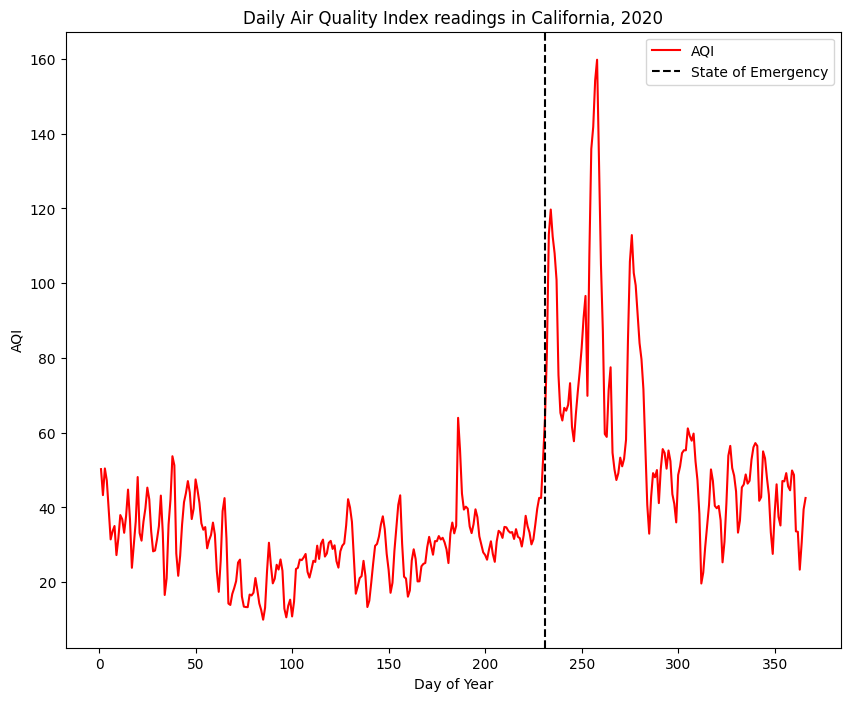

In [7]:
# plot the daily data
daily.plot(color='red')

#add title and axis labels
plt.title('Daily Air Quality Index readings in California, 2020')
plt.ylabel('AQI')
plt.xlabel('Day of Year')

# add a dashed black line on August 18th (the 231st day of the year)
plt.axvline(231, color='black', linestyle='--', label='State of Emergency')
plt.legend()

We can clearly see some spikes in AQI that correspond directly to when the state of emergency was declared. Our data is matching expectations about reality: even though there's no information about the state of emergency or the wildfires in our dataframe (remember, it's just a bunch of air quality readings from sensors), we observe a relationship between our variables (presence of wildfires and air quality) that conforms to our expectations.

In [8]:
#Repeat the above plot but aggregate the dataframe by month rather than by day. Store the monthly data as a new dataframe called "monthly".

monthly = df.groupby('Month')['AQI'].mean()
monthly

,AQI
Month,
1,36.785335
2,36.390426
3,20.440278
4,23.573923
5,26.870524
6,27.972830
7,35.095005
8,57.367781
9,81.898925


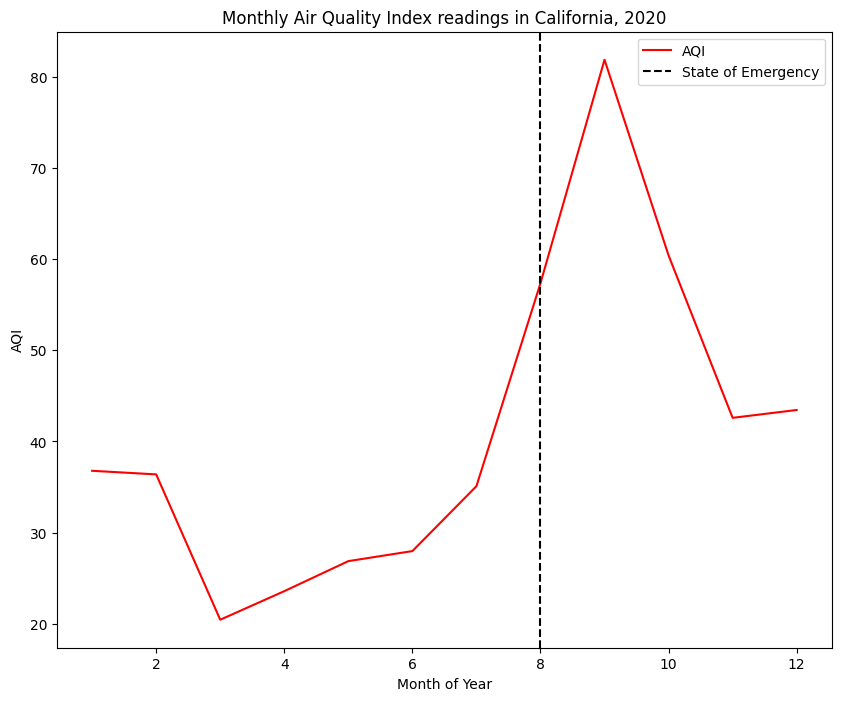

In [9]:
# plot the daily data
monthly.plot(color='red')

#add title and axis labels
plt.title('Monthly Air Quality Index readings in California, 2020')
plt.ylabel('AQI')
plt.xlabel('Month of Year')

# add a dashed black line on August 18th (the 8th month of the year)
plt.axvline(8, color='black', linestyle='--', label='State of Emergency')
plt.legend()

**Geographic Disparities**

OK. We've got a good sense of how the wildfires affected air quality readings across the whole state. But California is huge; there are probably geographic disparities in how bad air quality was as a result of the fires. Let's see which counties were worst affected by the wildfires.

In our original dataframe, each row was a reading from a given sensor on a given day. We grouped this data by day to create a dataframe that took the average of all sensors in california for each day as follows:

df.groupby('Day')['AQI'].mean()

-------

Now, we want to plot the average daily air quality by county; this will involve aggregating both by day and by county. Intuitively, we can accomplish this changing 'Day' to ['Day','COUNTY'], like so:

df.groupby(['Day','COUNTY'])['AQI'].mean()

Let's store this new dataframe and call it "county_daily":

In [15]:
county_daily=df.groupby(['Day','COUNTY',])['AQI'].mean().reset_index()
county_daily

,Day,COUNTY,AQI
0,1,Alameda,44.500000
1,1,Butte,66.666667
2,1,Calaveras,63.000000
3,1,Colusa,78.000000
4,1,Contra Costa,46.000000
...,...,...,...
17314,366,Tehama,52.000000
17315,366,Trinity,36.000000
17316,366,Tulare,62.666667
17317,366,Ventura,23.666667


In [16]:
#Using the groupby function, create a new dataframe called "counties" in which each row is a county, and each value is the maximum AQI value in that county during the entire year.
#Then, sort this dataframe in descending order using .sort_values(ascending=False)

counties = df.groupby('COUNTY')['AQI'].max().sort_values(ascending=False)
counties

,AQI
COUNTY,
Mono,714
Mariposa,574
Plumas,469
Mendocino,456
Santa Cruz,426
Inyo,420
Butte,379
Siskiyou,359
Sutter,303


Which county had the highest maximum AQI value? Which county had the lowest? store the names of these counties as varables called "highest" and "lowest", shown below:

In [17]:
highest='Mono'
lowest='Humboldt'

# Filter the county-level daily AQI readings for the worst-affected county
worst_county=county_daily[county_daily['COUNTY']==highest]

# Filter the county-level daily AQI readings for the least-affected county
best_county=county_daily[county_daily['COUNTY']==lowest]


Using those two variables, lets plot the AQI values for each of these counties individually:

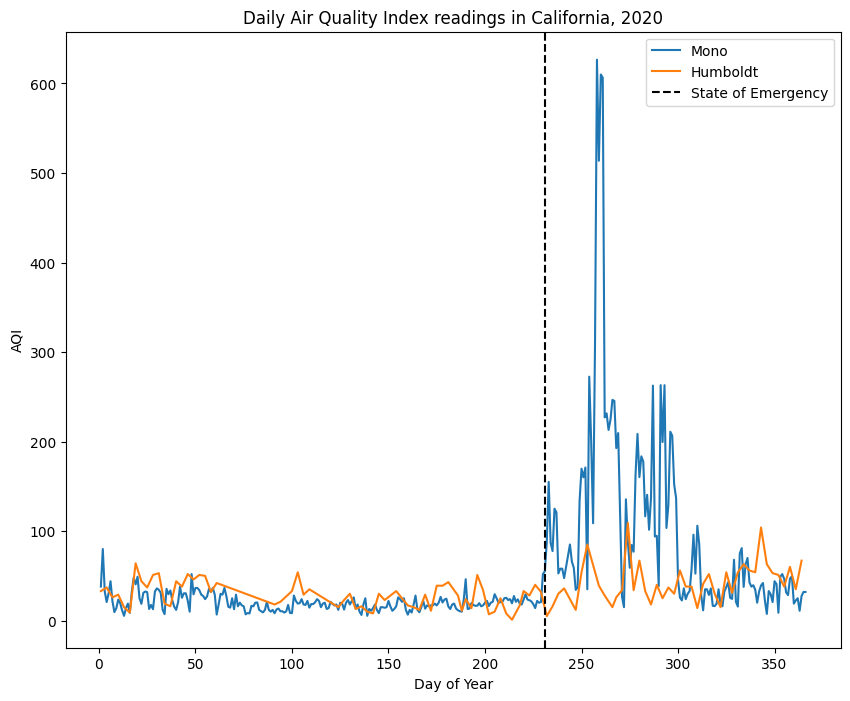

In [18]:
# plot the data from the worst affected county
plt.plot(worst_county['Day'], worst_county['AQI'], label=highest)

# plot the data from the least affected county
plt.plot(best_county['Day'], best_county['AQI'], label=lowest)

#add title and axis labels
plt.title('Daily Air Quality Index readings in California, 2020')
plt.ylabel('AQI')
plt.xlabel('Day of Year')

# add a dashed black line on August 18th (the 231st day of the year)
plt.axvline(231, color='black', linestyle='--', label='State of Emergency')
plt.legend()

We can see that the worst affected county suffered a massive spike in AQI following the wildfires, while the least affected county experienced a much smaller increase in AQI.

**Bringing in Geography**

We can explore some limited geographic variation using the "COUNTY" column in our dataframe. But we actually have the latitude and longitude of each individual sensor. We can visualize latitude and longitude data quite simply as a scatterplot.

Remember, in our original dataframe each row is a reading from a given sensor on a given day. The sensor's location does not vary over time, so if we simply plot our original dataframe, we'll have loads of points on top of each other. Let's pick a specific date, take a slice of our dataframe on that one date, and plot it. I've picked September 9th based on the plots above (looks like air quality was really bad).

Text(0.5, 1.0, 'Geographic Distribution of AQI sensors in California')

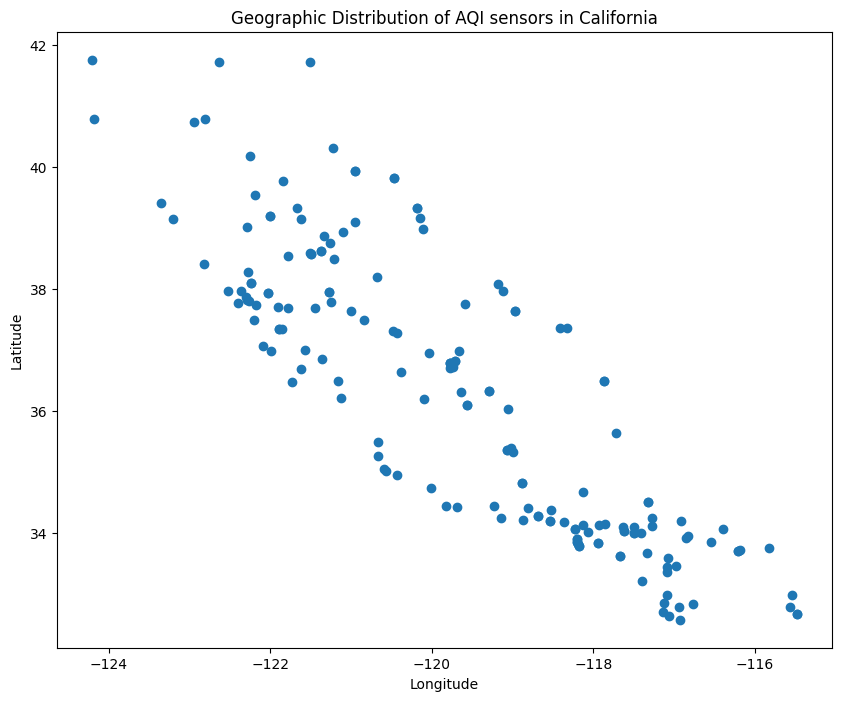

In [19]:
# create a variable with the date of interest, September 9th 2020.
date='09-09-2020'

# filter the original dataframe using this date
one_day=df[df['Date']==date]

# create a scatterplot of sensor locations using latitude and longitude
plt.scatter(
    x=one_day['longitude'],
    y=one_day['latitude'])

# as always, label our axes and the plot!
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of AQI sensors in California")

#the shape looks like California roughly

**Basemaps**

First, we may want to add in a base map of some kind so we can have a better sense of where each sensor is. For this, we have to import an extra library called "Basemap"

Text(0.5, 1.0, 'Geographic Distribution of AQI sensors in California')

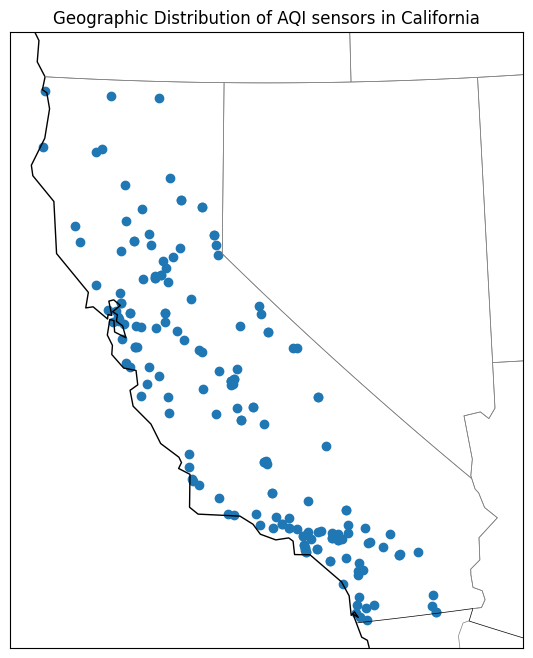

In [20]:
# import Basemap library
from mpl_toolkits.basemap import Basemap

# create a basemap, call it 'map'
map = Basemap(projection='lcc', resolution='l', # this selects the projection of the map.
            lat_0=37.5, lon_0=-119, # this sets the center of the map
            width=1E6, height=1.2E6) # this sets the window that we're looking at, in meters.

# We can add features to our blank basemap, including coastlines, as well as state and country boundaries.
map.drawcoastlines(color='black')
map.drawcountries(color='black')
map.drawstates(color='gray')

# Finally, we add in our AQI sensor data on top of the basemap.
map.scatter(
    one_day['longitude'],
    one_day['latitude'],
    latlon=True)

# as always, title your figure
plt.title("Geographic Distribution of AQI sensors in California")

We now have a much better sense of the actual distribution of these sensors within california. People who know the area will recognize clusters of sensors around San Francisco and Los Angeles; This makes sense, given that these areas have a higher population density. However, our plot is still missing some pretty important information: the actual AQI readings!

**Colormaps**

The whole point of plotting these sensors is to understand the spatial distribution of air pollution from the 2020 wildfires.

The EPA published the following table on their website, which creates a color-coded scale of AQI values that corresponds to the impact thereof on human health.

* AQI under 50 is colored green, and indicates "Good" air quality.
* AQI between 100 and 200 is generally unhealthy
* AQI over 300 is deemed hazardous.

With this in mind, quickly scroll back up to the AQI plots over time. If you did everything correctly, you should notice that the average AQI value across all sensors in the worst affected county was over 600!

We'll be using the table from the EPA website to build our own color map. In the code below, I scrape the table and turn it into a "colormap" (basically, a dictionary that associates numbers with colors) that we'll use to color the AQI sensors later.

In [21]:
# scrape the table of AQI values and corresponding colors
# save it as a dataframe called colors
colors=pd.read_html('https://www.airnow.gov/aqi/aqi-basics/')[0]

# create a numerical column for AQI values by splitting the test in the "values of index" column.
# pull out the first string, and convert it to integer
colors['aqi']=colors['Values of Index'].str.split(' ').str[0].astype(int)

# print three columns from the dataframe
print(colors[['aqi','Daily AQI Color','Levels of Concern']])

# create a "colormap" from this dataframe using the "Daily AQI Color" column, and the "aqi" column
aqi_colors=matplotlib.colors.LinearSegmentedColormap.from_list(colors['aqi'],colors['Daily AQI Color'])

   aqi Daily AQI Color               Levels of Concern
0    0           Green                            Good
1   51          Yellow                        Moderate
2  101          Orange  Unhealthy for Sensitive Groups
3  151             Red                       Unhealthy
4  201          Purple                  Very Unhealthy
5  301          Maroon                       Hazardous


Now, we can use this "aqi_colors" object as a color palette later when we plot the AQI sensors. This way, we will know that green and yellow points are OK, while red and purple points represent hazardous levels of air pollution.

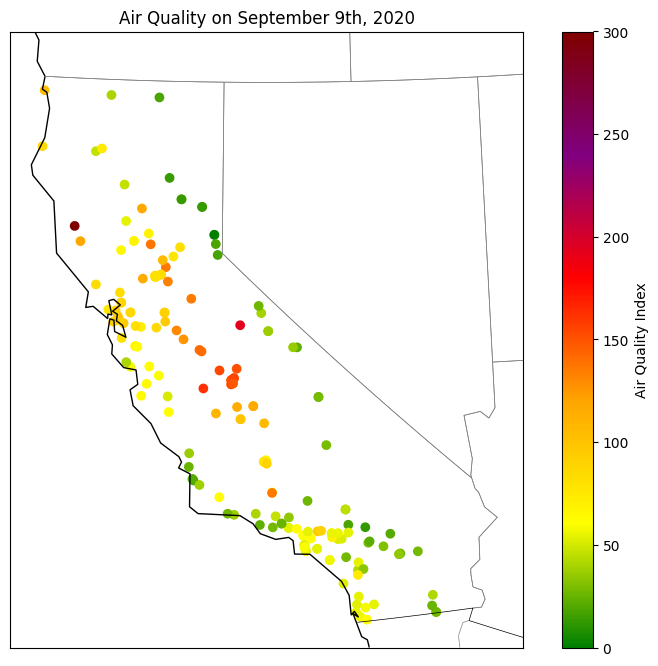

In [22]:
map = Basemap(projection='lcc', resolution='l',
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)

map.drawcoastlines(color='black')
map.drawcountries(color='black')
map.drawstates(color='gray')

map.scatter(
      one_day['longitude'],
      one_day['latitude'],
      latlon=True,
      c=one_day['AQI'], # We're adding that
      cmap=aqi_colors,
      vmin=0,
      vmax=300)


plt.title('Air Quality on September 9th, 2020')
plt.colorbar(label='Air Quality Index');

This plot gives us a good sense of which areas were worst affected by the wildfires on September 9th, 2020. Areas in the central valley suffered particularly bad air quality, with AQI reaching hazardous levels in some areas.

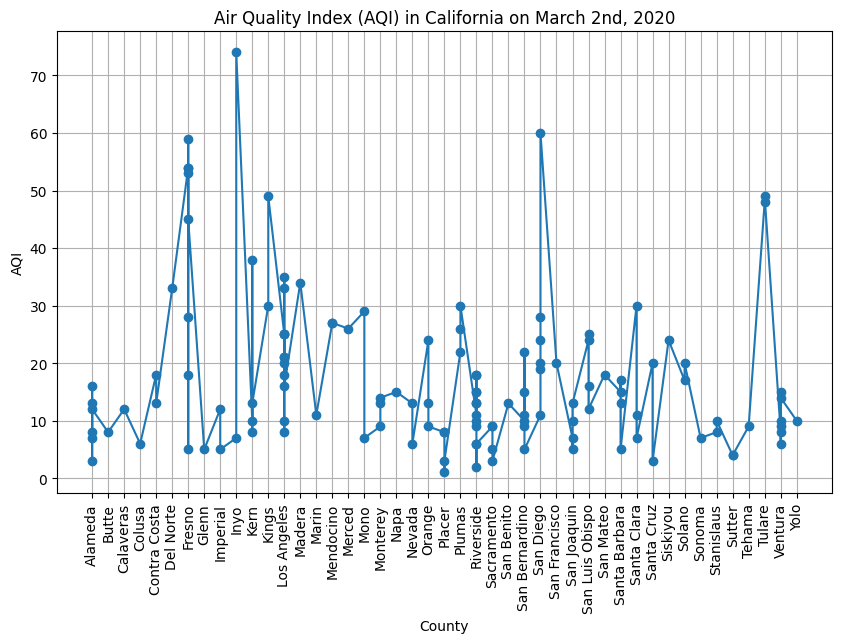

In [23]:
#Exercise
#So far, we've been plotting data from one day, using a dataframe we generated by filtering the date column like so: one_day=df[df['Date']=='09-09-2020'] (date format is day-month-year).
#Using the code from the previous cell, generate a plot of AQI on March 2nd, 2020. After that, use the groupby function to generate a plot of the maximum AQI reading for each sensor and plot it.

# Filter data for March 2nd, 2020
one_day = df[df['Date'] == '2020-03-02']  # Note: Assuming 'Date' column is in datetime format

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(one_day['COUNTY'], one_day['AQI'], marker='o', linestyle='-')

plt.title('Air Quality Index (AQI) in California on March 2nd, 2020')
plt.xlabel('County')
plt.ylabel('AQI')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.grid(True)

plt.show()

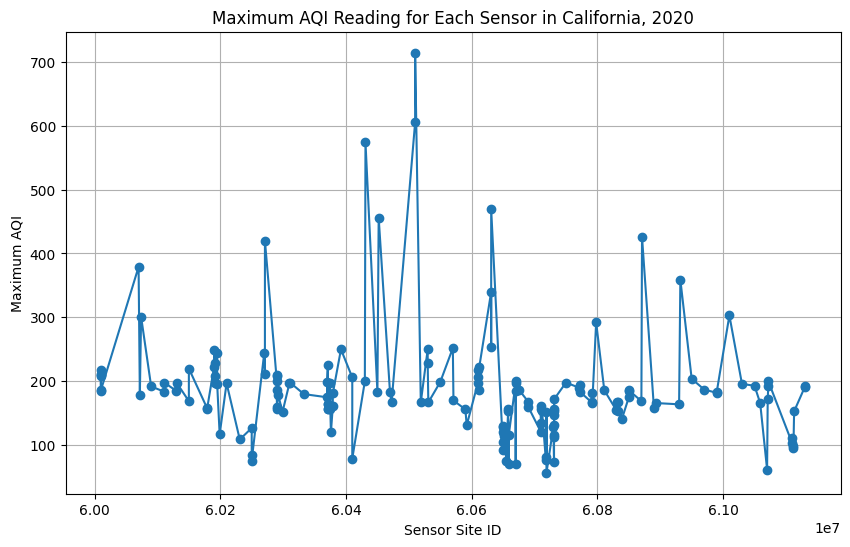

In [24]:
#Plotting Max AQI for each sensor

# Group by sensor and get maximum AQI
sensor_max_aqi = df.groupby('Site ID')['AQI'].max()

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(sensor_max_aqi.index, sensor_max_aqi.values, marker='o', linestyle='-')

plt.title('Maximum AQI Reading for Each Sensor in California, 2020')
plt.xlabel('Sensor Site ID')
plt.ylabel('Maximum AQI')
plt.grid(True)

plt.show()

**Advanced: Satellite Imagery and Interactivity**

The AQI plots we've generated above give us a good sense of where the worst air pollution was on a given day; but we're still basically inferring the presence of fires. Luckily, we don't have to do that. The plumes of smoke generated by the fires were so vast that they were visible from space. There are a variety of satellites that image the earth each day (some, like GOES-17, take a picture every few minutes!).

NASA's Moderate Resolution Imaging Spectroradiometer (MODIS) satellites take a picture of the same spot on earth nearly every day. So far, we've been looking at September 9th as a particularly bad day for air quality in California. Let's have a look at a satellite image from that day. A Python library called ipyleaflet contains some useful functions that let us pull up an interactive map of satellite imagery.

In [36]:
# import the map making modules from ipyleaflet
from ipyleaflet import Map, Marker, basemaps, basemap_to_tiles,Circle
from ipywidgets import HTML

# let create an interactive Map object called "satellite_map"
satellite_map = Map(
  basemap=basemap_to_tiles( #this function lets us pick from a list of basemaps for our interactive map
    basemaps.NASAGIBS.ModisTerraTrueColorCR, "2020-09-09" # here we're specifying that we want MODIS imagery, and the date that we want it from
  ),
  center=(36.77, -119.41), # then, we want to center the map on california. these coordinates do that
  zoom=5, #finally, we want to set the zoom level of the map.
)

# once we've created the map object we can make it bigger or smaller. let's make it 700 pixels tall.
satellite_map.layout.height = '700px'

# now, we visualize it.
satellite_map

Map(center=[36.77, -119.41], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

**Combining sensors and satellite images**

A cool part of working with spatial data is that we can combine two completeley different datasets using spatial information. We can add the AQI sensor data as points to this map.

In [37]:
# grab the first row from our September 9th dataframe
row=one_day.iloc[0]
print(row)

# This part uses the AQI value in this row (72), and looks up the corresponding color in the colormap we created earlier
color=matplotlib.colors.rgb2hex(aqi_colors(row['AQI']))

# Now we create a Circle object using the latitude and longitude from the row, and color it using the color we just selected
point=Circle(location=(row['latitude'],row['longitude']), color=color)

# Add this as a layer to the satellite_map object
satellite_map.add_layer(point)

# Display the updated map
satellite_map

Date                       2020-03-02 00:00:00
Site ID                               60010007
POC                                          3
PM                                         1.9
AQI                                          8
Site Name                            Livermore
CBSA_NAME    San Francisco-Oakland-Hayward, CA
COUNTY                                 Alameda
latitude                             37.687526
longitude                          -121.784217
Month                                        3
Day                                         62
Week                                        10
Name: 58, dtype: object


Map(bottom=3545.0, center=[36.77409249464195, -119.3994140625], controls=(ZoomControl(options=['position', 'zo…

It's a bit hard to see, but we've plotted an AQI sensor! its under the cloud of smoke in the center of the map. You can zoom in to get a closer look. looks like AQI was pretty bad at this location.

Having plotted one point, we can now plot all the points on September 9th! to do so, we can use the iterrows function in Pandas which, suprisingly, lets you iterate over rows in a dataframe. The first line of code below allows us to iterate over the rows in the one_day dataframe. It will then run everything in the indented block for each row; in other words, for each row, it will:

* use the row's value in the AQI value to select a color for the point
* create a point object using the latitude and longitude columns
* add that point to the satellite map.

In [38]:
for index, row in one_day.iterrows():
  color=matplotlib.colors.rgb2hex(aqi_colors(row['AQI']))
  point=Circle(location=(row['latitude'],row['longitude']), color=color)
  satellite_map.add_layer(point)

# display the map
satellite_map

Map(bottom=3545.0, center=[36.77409249464195, -119.3994140625], controls=(ZoomControl(options=['position', 'zo…

Theres a pretty striking trend in this data. If you zoom in, you'll see that the AQI sensors to the East are all green since they are up-wind from the fires. A few kilometers downwind of the fires, the AQI sensors display very high readings.

Remember, our AQI data and the satellite imagery are derived from totally different sources, and are totally different types of data, but they seem to be telling us the same story. They actually complement each other in important ways.

In our original plot of the AQI sensors without satellite imagery, we could tell that there was bad air quality on September 9th, but some sensors were green and others were red. The satellite image shows us that the variation in AQI across California on September 9th was due to the direction of the wind, blowing the smoke from the wildfires westward.

**Function**

Now, to save some hassle we can package all the code we used to generate this map into one clean function. Because we're effectively just changing the date, we can configure this function so that we can feed it a different date, and it will grab a satellite image and filter our dataframe for values occuring on that day. Then, we can draw a new map in one line of code.

In [39]:
def satellite_plot(date):

  ymd=datetime.strptime(date, '%d-%m-%Y').strftime('%Y-%m-%d')

  satellite_map = Map(
    basemap=basemap_to_tiles(
      basemaps.NASAGIBS.ModisTerraTrueColorCR, ymd
    ),
    center=(36.77, -119.41),
    zoom=6,
  )

  satellite_map.layout.height = '700px'

  one_day=df[df['Date']==date]

  for index, row in one_day.iterrows():
    color=matplotlib.colors.rgb2hex(aqi_colors(row['AQI']))
    point=Circle(location=(row['latitude'],row['longitude']), color=color)
    point.popup = HTML(str(row['Site Name']))
    satellite_map.add_layer(point)
  return satellite_map

In [40]:
satellite_plot('02-03-2020')

Map(center=[36.77, -119.41], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

# Assessed Question 3 (INCOMPLETE)

Earlier, we created a dataframe called daily in which we calculated the average daily AQI across the state for every day of the year. (hint: try re-generating this dataframe using the Date column rather than the Day column in the .groupby() function)

1. Sort that dataframe to figure out which day had the second worst AQI.
2. Plug that date into the satellite_plot() function to visualize the corresponding satellite image. If you've done things correctly so far, you should see a big plume of smoke emanating from the mountains of california spreading northwards.
3. Clicking on a sensor will reveal its name-- which sensor is closest to the plume's origin?